In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00


# 加载数据
计划使用1k张先试一试,image保存在本地，caption取第一个，使用bert提取文本特征，vit提取图片特征，然后使用矩阵乘法判断图片和文本的相似度.
froze所有的image与text encoder，用两个linear去做projection，然后计算cosine相似度。

In [ ]:
from datasets import load_dataset

coco_captions = load_dataset("phiyodr/coco2017")
import os
os.mkdir('train2017')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from tqdm import tqdm
import requests
captions = {}
file_loc = {}
for i in tqdm(range(10000)):
  image_id = coco_captions['train'][i]['image_id']
  file_name = coco_captions['train'][i]['file_name']
  file_url  = coco_captions['train'][i]['coco_url']
  response = requests.get(file_url)
  with open(file_name, 'wb') as f:
    f.write(response.content)
  file_loc[file_name[10:]] = coco_captions['train'][i]['image_id']
  captions[image_id] = coco_captions['train'][i]['captions'][0]

100%|██████████| 10000/10000 [1:05:01<00:00,  2.56it/s]


保存一下上方代码结果

In [ ]:
!tar -cvf train2017

In [2]:
!gdown 1VvTHJtJ662A8RnWAB5xlVoU6LUqfwiLE
!gdown 1L3JDGf9r6DV5sUlOCznICgX4OuxGXwji
!gdown 1-A1hxnNNH-1uTJBsW6dA25OteJeYsMF4

Downloading...
From: https://drive.google.com/uc?id=1VvTHJtJ662A8RnWAB5xlVoU6LUqfwiLE
To: /content/file_loc.pkl
100% 238k/238k [00:00<00:00, 76.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1L3JDGf9r6DV5sUlOCznICgX4OuxGXwji
To: /content/captions.pkl
100% 600k/600k [00:00<00:00, 87.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-A1hxnNNH-1uTJBsW6dA25OteJeYsMF4
From (redirected): https://drive.google.com/uc?id=1-A1hxnNNH-1uTJBsW6dA25OteJeYsMF4&confirm=t&uuid=d103799e-e7a2-4fee-9993-b7f306955f6c
To: /content/train2017.tar
100% 1.63G/1.63G [00:18<00:00, 89.8MB/s]


In [ ]:
!tar -xvf train2017.tar

使用pickle保存python变量（这部分需要改一下）

In [3]:
import pickle

# my_list = ["apple", "banana", "cherry"]

# with open("my_list.pkl", "wb") as f:
#     pickle.dump(my_list, f)# 读取保存在文件中的列表
with open("captions.pkl", "rb") as f:
    captions = pickle.load(f)

with open("file_loc.pkl", "rb") as f:
    file_loc = pickle.load(f)

In [4]:
for key in file_loc:
    print(key)  # Output: name, age, city
    print(file_loc[key])
    break

for key in captions:
  print(key)
  print(captions[key])
  break

000000391895.jpg
391895
391895
A man with a red helmet on a small moped on a dirt road. 


In [ ]:
import os

directory_path = "train2017"
imgs = os.listdir(directory_path)


测试能否成功获取embedding

In [6]:
import torch
from PIL import Image
from transformers import ViTFeatureExtractor, ViTModel

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224')


# image = Image.open("train2017/"+imgs[0])  # Replace 'my_image.jpg' with your image path
# inputs = feature_extractor(images=image, return_tensors="pt")

# with torch.no_grad():
#     outputs = vit_model(**inputs)
#     last_hidden_states = outputs.last_hidden_state

# image_embeddings = last_hidden_states[0, 0, :]  # Extract CLS token embedding

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
t_model = BertModel.from_pretrained('bert-base-uncased')
text = 'hello world'
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    outputs = t_model(**inputs)
    last_hidden_states = outputs.last_hidden_state[0,0,:]
print(last_hidden_states.shape)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.Size([768])


In [ ]:
for key in file_loc:
  print(key)
  break

000000391895.jpg


准备X与y的embedding，下面的代码会花费很长时间

In [8]:
from tqdm import tqdm


def extract_features_in_batches(file_loc, captions, feature_extractor, vit_model, tokenizer, batch_size=32):
    X = []
    y = []
    for i in tqdm(range(0, len(file_loc), batch_size)):
        batch_keys = list(file_loc.keys())[i:i+batch_size]  # Get a batch of keys

        images = []
        texts = []
        for key in batch_keys:
            image = Image.open("train2017/"+key).convert('RGB')
            images.append(image)
            texts.append(captions[file_loc[key]])  # Assuming 'captions' is a dictionary

        # Batchwise Feature Extraction
        with torch.no_grad():
            inputs = feature_extractor(images=images, return_tensors="pt")
            outputs = vit_model(**inputs)
            last_hidden_states = outputs.last_hidden_state
            y.extend(last_hidden_states[:,0,:].tolist())  # Efficient appending

            inputs = tokenizer(texts, return_tensors="pt", padding='max_length', truncation=True, max_length=20)
            outputs = t_model(**inputs)
            last_hidden_states = outputs.last_hidden_state[:,0,:]
            X.extend(last_hidden_states.tolist())

    return X, y

# Usage (assuming 'file_loc' is a dictionary and 'captions' is accessible):
X, y = extract_features_in_batches(file_loc, captions, feature_extractor, vit_model, tokenizer)

100%|██████████| 313/313 [2:33:58<00:00, 29.52s/it]


In [9]:
with open("X.pkl", "wb") as f:
    pickle.dump(X, f)# 读取保存在文件中的列表


with open("y.pkl", "wb") as f:
    pickle.dump(y, f)# 读取保存在文件中的列表

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ContrastiveLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, embedding_1, embedding_2,embedding_3,embedding_4):  # Labels: 1 for positive, -1 for negative
    # 1-2 是pos pair ， 1 - 3，2-4 代表 neg pair
        temp1 = torch.exp(F.cosine_similarity(embedding_1, embedding_2, dim=-1))
        temp2 = torch.exp(F.cosine_similarity(embedding_1, embedding_4, dim=-1))
        temp3 = torch.exp(F.cosine_similarity(embedding_2, embedding_3, dim=-1))
        return - torch.log(temp1 / (temp2+temp3 + temp1))

class TwoLayerMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.GELU()  # Or your preferred activation function
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, input_tensor):
        out = self.linear1(input_tensor)
        out = self.activation(out)
        out = self.linear2(out)
        return out

class sim_model(nn.Module):
    def __init__(self):
      super().__init__()
      self.image_pro = TwoLayerMLP(768,512,128)
      self.text_pro = TwoLayerMLP(768,512,128)

    def forward(self,image_emb,text_emb):
      return self.image_pro(image_emb),self.text_pro(text_emb)

con_loss = ContrastiveLoss()
smodel = sim_model()



这部分是可以做成batch的，dataloader的每一条是pos和neg pair

In [19]:
import random
optim = torch.optim.Adam(smodel.parameters(),lr=0.001)
train_size = 9500


def train(epochs):
  for e in range(epochs):
    total_loss = 0
    for i in range(train_size):
      optim.zero_grad()
      pos_1,pos_2 = smodel(torch.tensor(X[i]),torch.tensor(y[i]))
      forbidden_value = i  # Replace with your 'i'
      values = list(range(len(X)))
      values.remove(forbidden_value)

      random_value1 = random.choice(values)
      random_value2 = random.choice(values)


      neg_1,neg_2 = smodel(torch.tensor(X[random_value1]),torch.tensor(y[random_value2]))

      loss = con_loss(pos_1,pos_2,neg_1,neg_2)
      optim.zero_grad()
      total_loss += loss.item()
      loss.backward()

      optim.step()
    print('epoch:{},loss{}'.format(e,total_loss/len(X)))

train(20)

epoch:0,loss0.7303119759336114
epoch:1,loss0.6519349187552929
epoch:2,loss0.6332453841269017
epoch:3,loss0.6180805268168449
epoch:4,loss0.6090849158287048
epoch:5,loss0.6086362454921007
epoch:6,loss0.5986618597000838
epoch:7,loss0.595077694067359
epoch:8,loss0.5928159121662379
epoch:9,loss0.5910921784192323
epoch:10,loss0.5880577692061663
epoch:11,loss0.5857591522365808
epoch:12,loss0.5840519605696202
epoch:13,loss0.582964917203784
epoch:14,loss0.5779210748255252
epoch:15,loss0.5775074700176716
epoch:16,loss0.5758122677862644
epoch:17,loss0.5757821319639683
epoch:18,loss0.5735173510074616
epoch:19,loss0.5716871761411428


In [27]:
def evaluate():
  smodel.eval()
  correct = 0
  for i in range(train_size,len(X)):
    forbidden_value = i

    values = list(range(train_size,len(X)))
    values.remove(forbidden_value)
    true_index = i

    fake_value1 = random.choice(values)
    fake_value2 = random.choice(values)
    fake_value3 = random.choice(values)
    a,b = smodel(torch.tensor(X[true_index]),torch.tensor(y[true_index]))
    sim_true = F.cosine_similarity(a,b,dim=-1)
    a,b = smodel(torch.tensor(X[true_index]),torch.tensor(y[fake_value1]))
    sim_fake1 = F.cosine_similarity(a,b,dim=-1)
    a,b = smodel(torch.tensor(X[true_index]),torch.tensor(y[fake_value2]))
    sim_fake2 = F.cosine_similarity(a,b,dim=-1)
    a,b = smodel(torch.tensor(X[true_index]),torch.tensor(y[fake_value3]))
    sim_fake3 = F.cosine_similarity(a,b,dim=-1)

    sim_list = [sim_true,sim_fake1,sim_fake2,sim_fake3]
    if sim_list.index(max(sim_list)) == 0:
      correct+=1

  print('precision:',correct/(len(X)-train_size))

evaluate()



precision: 0.792


In [ ]:
X

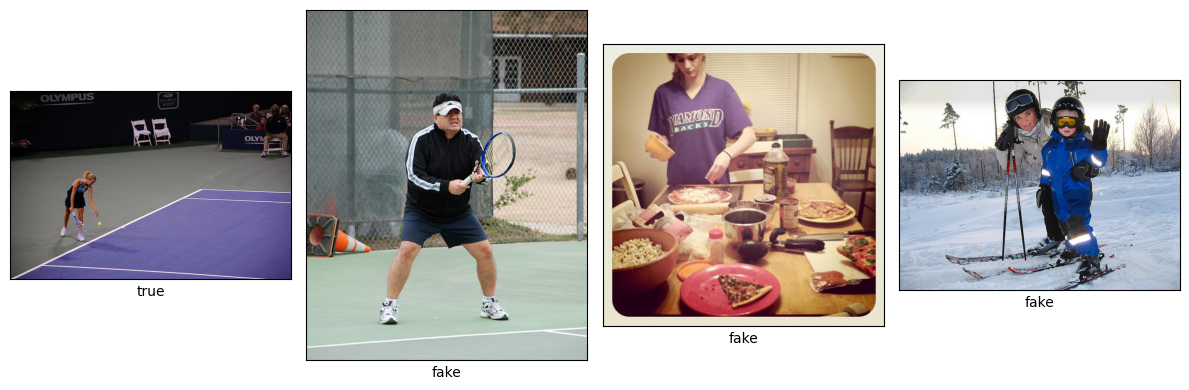

prediction: 0
caption: A women who is bouncing a tennis ball.


In [30]:
import matplotlib.pyplot as plt

def show_performence():
  smodel.eval()

  values = list(range(train_size,len(X))) # exclude train data
  true_index = random.choice(values)
  forbidden_value = true_index
  values.remove(forbidden_value)

  fake_value1 = random.choice(values)
  fake_value2 = random.choice(values)
  fake_value3 = random.choice(values)

  a,b = smodel(torch.tensor(X[true_index]),torch.tensor(y[true_index]))
  sim_true = F.cosine_similarity(a,b,dim=-1)
  a,b = smodel(torch.tensor(X[true_index]),torch.tensor(y[fake_value1]))
  sim_fake1 = F.cosine_similarity(a,b,dim=-1)
  a,b = smodel(torch.tensor(X[true_index]),torch.tensor(y[fake_value2]))
  sim_fake2 = F.cosine_similarity(a,b,dim=-1)
  a,b = smodel(torch.tensor(X[true_index]),torch.tensor(y[fake_value3]))
  sim_fake3 = F.cosine_similarity(a,b,dim=-1)


  key1 = list(file_loc.keys())[true_index]
  key2 = list(file_loc.keys())[fake_value1]
  key3 = list(file_loc.keys())[fake_value2]
  key4 = list(file_loc.keys())[fake_value3]
  # Image paths (replace with your actual paths)
  img_paths = ['train2017/'+key1, 'train2017/'+key2,
              'train2017/'+key3, 'train2017/'+key4]
  sim_list = [sim_true,sim_fake1,sim_fake2,sim_fake3]
  # Labels
  labels = ['true', 'fake', 'fake', 'fake']


  # Load images
  images = [Image.open(path) for path in img_paths]

  # Create figure and subplots
  fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

  # Display images and add labels
  for img, label, ax in zip(images, labels, axes):
    ax.imshow(img)
    ax.set_xlabel(label)
    ax.set_xticks([])  # Optional: Remove x-axis ticks
    ax.set_yticks([])  # Optional: Remove y-axis ticks

  plt.tight_layout()  # Adjust layout to avoid overlapping labels
  plt.show()
  print('prediction:',sim_list.index(max(sim_list)))
  print('caption:',captions[file_loc[key1]])

show_performence()